<a href="https://colab.research.google.com/github/SJonauskas/Universitetas/blob/main/WineQuality_v2_%C5%A0ar%C5%ABnas_Jonauskas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Šarūnas Jonauskas 2022-03-31**
---

1. Take the dataset you picked during the last homework and split it into training and testing subsets. If there’s an “official” way to do this given in the description of the data or literature you should use that, otherwise use your best judgement.
2. If there’s enough data also make a separate validation subset.
3. Train models on the data, try to obtain the best accuracy you can WITHOUT
overfitting. Keep a log of what you tried.
4. Do a short presentation (~5-10mins) on what you found:
  * Short dataset description (you should already have a writeup from the previous homework).
  * What did you try? What worked, what didn’t? Show table with hyperparameters and accuracies.
  * What accuracy did you achieve. Was it better or worse than you expected? Compared to literature? Compared to the baseline you calculated in the first part of this homework?


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Duomenų bazė ***Wine Quality Data Set*** ir duomenų padalinimas

Mano pasirinkimas – Wine Quality Data Set – https://archive.ics.uci.edu/ml/datasets/Wine+Quality.


  Duomenų bazėje (balti vynai) yra 4898 skirtingų objektų. Atributų yra 11. Iš pirmo žvilgsnio yra gana sunku pasakyti kokie parametrai ir jų vertės įtakoja galutinį rezultatą. Straipsnyje buvo ieškomi pagrindiniai kintamieji, kurie turi didžiausia įtaka. Mažiausiai įtakojančius yra galima išmesti norint supaprastinti užduotį. Baltam vynui labiausiai įtakos daro **sulfitai**, **alkoholis** ir **cukraus likutis**.

In [ ]:
data = pd.read_csv("./drive/MyDrive/Colab Notebooks/WineQuality/winequality-white.csv", sep=';')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [ ]:
data['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

Regis sėkmingai pavyksta sukurti produktą kuris šiek tiek geresnis nei vidurkis (pagal balų skalę 0-10). Vertė kurė pasiekta daugiausiai – 6. Vos keletas vynų gavo 3 ar 9, o 0-2 ir 10 išviso nepavyko gauti.

Autoriams bendrai pavyko gauti tikslumą virš 90% (skirtingoms vertėms buvo gautas kitokios vertės).

# **Tikslas: pasiekti daugiau, nei 70% tikslumą.**

Padalinu duomenų bazę į 60% mokymo, 20% validavimo ir 20% testavimo dalis.

# Modelio mokymas ir testavimas


![](https://drive.google.com/uc?export=view&id=1iCrecFDazeYLynP-zPeEiTpmj6odPkd3)


Pakraunami mokymo duomenys.

In [ ]:
quality_3 = data[data["quality"] == 3]
quality_4 = data[data["quality"] == 4]
quality_5 = data[data["quality"] == 5]
quality_6 = data[data["quality"] == 6]
quality_7 = data[data["quality"] == 7]
quality_8 = data[data["quality"] == 8]
quality_9 = data[data["quality"] == 9]

#input_attributes = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides",
#                    "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]

# sumazinau iki 5 didziausia reiksme turinciu kintamuju
input_attributes = ["citric acid", "residual sugar", "total sulfur dioxide", "sulphates", "alcohol"]

output_attribute = ["quality"]

samples_len = len(data)

# Duomenu pavertimas i naudojamus modeliui
X_data = np.ones((samples_len, 5), dtype=np.float32)
X_data = data[input_attributes].to_numpy()

Y_data = np.ones((samples_len, 1), dtype=np.float32)
Y_data = data[output_attribute].to_numpy()

# buvo bandoma naudoti train_test_split
X_train, X_validate_test = train_test_split(X_data, test_size=0.40, random_state=51)
X_validate, X_test = train_test_split(X_validate_test, test_size=0.50)

Y_train, Y_validate_test = train_test_split(Y_data, test_size=0.40, random_state=51)
Y_validate, Y_test = train_test_split(Y_validate_test, test_size=0.50)

# Duomenu normavimas. mean = 0 ir stddev = 1
mean = np.mean(X_train, axis=0)
stddev = np.std(X_train, axis=0)

X_train = (X_train - mean) / stddev
X_validate = (X_validate - mean) / stddev
X_test = (X_test - mean) / stddev

X_train, X_validate = X_train.astype('float32'), X_validate.astype('float32')

In [ ]:
# output verciu konvertavimas
from sklearn import preprocessing

enc = preprocessing.OneHotEncoder()
enc.fit(Y_train)
Y_train = enc.transform(Y_train).toarray()

enc.fit(Y_validate)
Y_validate = enc.transform(Y_validate).toarray()
#Y_validate = enc.transform(Y_validate).toarray()

Y_train = Y_train.astype('float32')
Y_validate = Y_validate.astype('float32')

| Tikroji vertė | Konvertuota vertė |
| --------- | ------------- |
| 3       | 0       |
| 4 | 1 |
| 5 | 2 |
| 6 | 3 |
| 7 | 4 |
| 8 | 5 |
| 9 | 6 |



In [ ]:
X_train, Y_train, len(Y_train[0])

(array([[-0.2848082 ,  1.3014987 ,  0.5378248 ,  0.10860018, -0.7519109 ],
        [-0.6956322 ,  0.32131028, -0.8740412 , -0.6022154 , -0.10684264],
        [-0.53130263, -0.2275952 , -0.8740412 ,  1.1748236 ,  1.4251945 ],
        ...,
        [-1.188621  , -0.18838766,  1.0403534 , -1.224179  , -0.2681097 ],
        [ 0.3725103 , -0.9529346 , -0.49116227,  0.46400797, -0.6712774 ],
        [ 0.04385106, -0.07076506, -0.20400308, -0.7799193 , -1.1550786 ]],
       dtype=float32), array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.]], dtype=float32), 7)

In [ ]:
X_validate, Y_validate, len(Y_validate[0])

(array([[-0.6956322 , -0.7568969 ,  1.0642834 , -0.7799193 ,  0.6188592 ],
        [ 1.2763232 , -0.09036883, -0.22793302, -0.06910371,  0.2156915 ],
        [-0.77779704,  0.02725377, -0.89797115, -1.401883  , -0.2681097 ],
        ...,
        [ 0.12601587, -0.1687839 ,  1.0882133 ,  0.10860018, -0.18747617],
        [-2.0102692 , -0.97253835,  0.08315611, -0.42451152, -0.34874323],
        [ 1.2763232 ,  0.16448015, -1.28085   , -1.4907349 ,  0.7801263 ]],
       dtype=float32), array([[0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), 7)

In [ ]:
X_train.shape, Y_train.shape

((2938, 5), (2938, 7))

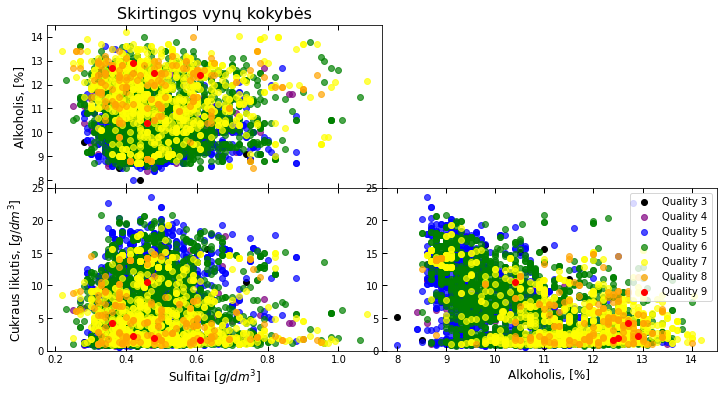

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(2, 2, 1)
plt.scatter(quality_3["sulphates"], quality_3["alcohol"], label="Quality 3", alpha=1, c="black")
plt.scatter(quality_4["sulphates"], quality_4["alcohol"], label="Quality 4", alpha=0.7, c="purple")
plt.scatter(quality_5["sulphates"], quality_5["alcohol"], label="Quality 5", alpha=0.7, c="blue")
plt.scatter(quality_6["sulphates"], quality_6["alcohol"], label="Quality 6", alpha=0.7, c="green")
plt.scatter(quality_7["sulphates"], quality_7["alcohol"], label="Quality 7", alpha=0.7, c="yellow")
plt.scatter(quality_8["sulphates"], quality_8["alcohol"], label="Quality 8", alpha=0.7, c="orange")
plt.scatter(quality_9["sulphates"], quality_9["alcohol"], label="Quality 9", alpha=1, c="red")

plt.title("Skirtingos vynų kokybės", size=16)
plt.ylabel("Alkoholis, [%]", size=12)
plt.tick_params(axis='y',direction='in',which='major',length=5,width=1)
plt.tick_params(axis='y',direction='in',which='minor', length=2.5,width=1)
plt.tick_params(axis='x',direction='in',which='major',top=True,length=5,width=1)
plt.tick_params(axis='x',direction='in',which='minor',top=True,length=2.5,width=1)

plt.subplot(2, 2, 3)
plt.scatter(quality_3["sulphates"], quality_3["residual sugar"], label="Quality 3", alpha=1, c="black")
plt.scatter(quality_4["sulphates"], quality_4["residual sugar"], label="Quality 4", alpha=0.7, c="purple")
plt.scatter(quality_5["sulphates"], quality_5["residual sugar"], label="Quality 5", alpha=0.7, c="blue")
plt.scatter(quality_6["sulphates"], quality_6["residual sugar"], label="Quality 6", alpha=0.7, c="green")
plt.scatter(quality_7["sulphates"], quality_7["residual sugar"], label="Quality 7", alpha=0.7, c="yellow")
plt.scatter(quality_8["sulphates"], quality_8["residual sugar"], label="Quality 8", alpha=0.7, c="orange")
plt.scatter(quality_9["sulphates"], quality_9["residual sugar"], label="Quality 9", alpha=1, c="red")

plt.xlabel("Sulfitai $[g/dm^{3}]$", size=12)
plt.ylabel("Cukraus likutis, $[g/dm^{3}]$", size=12)
plt.ylim(0, 25)
plt.tick_params(axis='y',direction='in',which='major',length=5,width=1)
plt.tick_params(axis='y',direction='in',which='minor', length=2.5,width=1)
plt.tick_params(axis='x',direction='in',which='major',top=True,length=5,width=1)
plt.tick_params(axis='x',direction='in',which='minor',top=True,length=2.5,width=1)

plt.subplot(2, 2, 4)
plt.scatter(quality_3["alcohol"], quality_3["residual sugar"], label="Quality 3", alpha=1, c="black")
plt.scatter(quality_4["alcohol"], quality_4["residual sugar"], label="Quality 4", alpha=0.7, c="purple")
plt.scatter(quality_5["alcohol"], quality_5["residual sugar"], label="Quality 5", alpha=0.7, c="blue")
plt.scatter(quality_6["alcohol"], quality_6["residual sugar"], label="Quality 6", alpha=0.7, c="green")
plt.scatter(quality_7["alcohol"], quality_7["residual sugar"], label="Quality 7", alpha=0.7, c="yellow")
plt.scatter(quality_8["alcohol"], quality_8["residual sugar"], label="Quality 8", alpha=0.7, c="orange")
plt.scatter(quality_9["alcohol"], quality_9["residual sugar"], label="Quality 9", alpha=1, c="red")

plt.xlabel("Alkoholis, [%]", size=12)
plt.ylim(0, 25)
plt.tick_params(axis='y',direction='in',which='major',length=5,width=1)
plt.tick_params(axis='y',direction='in',which='minor', length=2.5,width=1)
plt.tick_params(axis='x',direction='in',which='major',top=True,length=5,width=1)
plt.tick_params(axis='x',direction='in',which='minor',top=True,length=2.5,width=1)
plt.legend()

plt.subplots_adjust(hspace=.0, wspace=.0)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation="relu", input_shape=[5,]),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(7, activation="softmax")
])
model.summary()

Model: "sequential_73"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_326 (Dense)           (None, 256)               1536      
                                                                 
 dense_327 (Dense)           (None, 256)               65792     
                                                                 
 dense_328 (Dense)           (None, 256)               65792     
                                                                 
 dense_329 (Dense)           (None, 7)                 1799      
                                                                 
Total params: 134,919
Trainable params: 134,919
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

model.fit(X_train, Y_train, epochs=10, batch_size=24, verbose=1, validation_data=(X_validate, Y_validate))
# validation_data=(X_validate, Y_validate)

loss, accuracy = model.evaluate(X_train, Y_train)
print(f"Training loss: {loss:.4f}, Training accuracy: {accuracy:.4f}")

Epoch 1/10
123/123 [==============================] - 2s 8ms/step - loss: 0.7441 - accuracy: 0.6726 - val_loss: 2.6029 - val_accuracy: 0.3602
Epoch 2/10
123/123 [==============================] - 1s 6ms/step - loss: 0.7228 - accuracy: 0.6903 - val_loss: 2.6043 - val_accuracy: 0.3367
Epoch 3/10
123/123 [==============================] - 1s 10ms/step - loss: 0.7130 - accuracy: 0.6818 - val_loss: 2.7086 - val_accuracy: 0.3735
Epoch 4/10
123/123 [==============================] - 1s 8ms/step - loss: 0.7021 - accuracy: 0.6937 - val_loss: 2.6263 - val_accuracy: 0.3306
Epoch 5/10
123/123 [==============================] - 1s 7ms/step - loss: 0.6885 - accuracy: 0.7046 - val_loss: 2.6506 - val_accuracy: 0.3653
Epoch 6/10
123/123 [==============================] - 1s 7ms/step - loss: 0.6787 - accuracy: 0.7042 - val_loss: 2.7233 - val_accuracy: 0.3592
Epoch 7/10
123/123 [==============================] - 0s 4ms/step - loss: 0.6767 - accuracy: 0.7073 - val_loss: 2.7906 - val_accuracy: 0.3520
Epoch

![](https://drive.google.com/uc?export=view&id=12sv4PF6JbSvDFVZf8X5au4YYVjL8nacc) ![](https://drive.google.com/uc?export=view&id=1Z6pnXlPZJ_xM7cCy0sa0M5vsjsKZWA2q)

In [ ]:
prob_predictions = model(X_validate)

category_prediction = tf.math.argmax(prob_predictions, axis=1)
category_prediction = tf.cast(category_prediction, tf.int32)

y_category = tf.math.argmax(Y_validate, axis=1)
y_category = tf.cast(y_category, tf.int32)

correct_predictions = tf.equal(category_prediction, y_category)
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

Result = [category_prediction.numpy(), y_category.numpy()]

print(accuracy.numpy())

0.33628318


In [ ]:
Result

[array([3, 3, 4, ..., 2, 3, 3], dtype=int32),
 array([2, 5, 3, ..., 3, 3, 1], dtype=int32)]

In [ ]:
np.savetxt("./drive/MyDrive/Colab Notebooks/WineQuality/WineQuality_results_validate.csv", Result, fmt='%d', delimiter=",")